# 1.数据处理

In [1]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
iris = datasets.load_iris()
x = pd.DataFrame(iris['data'], columns=iris['feature_names'])
x.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
y = pd.DataFrame(iris['target'], columns=['target'])
y.head()

,target
0,0
1,0
2,0
3,0
4,0


In [5]:
iris_data = pd.concat([x,y], axis=1)
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [7]:
target_name = {
    0:'setosa',
    1:'versicolor',
    2:'virginica'
}
iris_data['target_name'] = iris_data['target'].map(target_name)
iris_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [8]:
iris_data = iris_data[(iris_data['target_name'] == 'setosa')|(iris_data['target_name'] == 'versicolor')]
iris_data = iris_data[['sepal length (cm)','petal length (cm)','target_name']]
iris_data

,sepal length (cm),petal length (cm),target_name
0,5.1,1.4,setosa
1,4.9,1.4,setosa
2,4.7,1.3,setosa
3,4.6,1.5,setosa
4,5.0,1.4,setosa
...,...,...,...
95,5.7,4.2,versicolor
96,5.7,4.2,versicolor
97,6.2,4.3,versicolor
98,5.1,3.0,versicolor


In [9]:
target_class = {
    'setosa':1,
    'versicolor':-1
}

iris_data['target_class'] = iris_data['target_name'].map(target_class)
iris_data.head()

,sepal length (cm),petal length (cm),target_name,target_class
0,5.1,1.4,setosa,1
1,4.9,1.4,setosa,1
2,4.7,1.3,setosa,1
3,4.6,1.5,setosa,1
4,5.0,1.4,setosa,1


In [10]:
iris_data

,sepal length (cm),petal length (cm),target_name,target_class
0,5.1,1.4,setosa,1
1,4.9,1.4,setosa,1
2,4.7,1.3,setosa,1
3,4.6,1.5,setosa,1
4,5.0,1.4,setosa,1
...,...,...,...,...
95,5.7,4.2,versicolor,-1
96,5.7,4.2,versicolor,-1
97,6.2,4.3,versicolor,-1
98,5.1,3.0,versicolor,-1


In [11]:
del iris_data['target_name']
iris_data

,sepal length (cm),petal length (cm),target_class
0,5.1,1.4,1
1,4.9,1.4,1
2,4.7,1.3,1
3,4.6,1.5,1
4,5.0,1.4,1
...,...,...,...
95,5.7,4.2,-1
96,5.7,4.2,-1
97,6.2,4.3,-1
98,5.1,3.0,-1


# 2.激活函数

In [11]:
def sign(z):
    if z > 0:
        return 1
    else:
        return -1

In [12]:
np.array(iris_data.iloc[0])[:2]

array([5.1, 1.4])

In [14]:
x = np.concatenate((np.array([1.]), np.array(iris_data.iloc[0])[:2])) 
x

array([1. , 5.1, 1.4])

In [15]:
y = np.array(iris_data.iloc[0])[2]
y

1.0

- numpy.concatenate() 将具有相同结构的array序列结合成一个array
- 初始化w = [0,0,0]，w都会透过之后的更新，來自动调整。
- error =1 主要是记录沒有错误分类的话就停止。
- iterator主要是用來记录更新了几次。


迭代次数: 0


c:\users\administrator\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


x: [1.  5.1 1.4]
w: [1.  5.1 1.4]


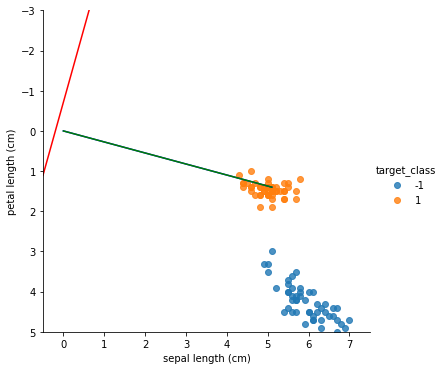

迭代次数: 1


c:\users\administrator\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


x: [1.  7.  4.7]
w: [ 0.  -1.9 -3.3]


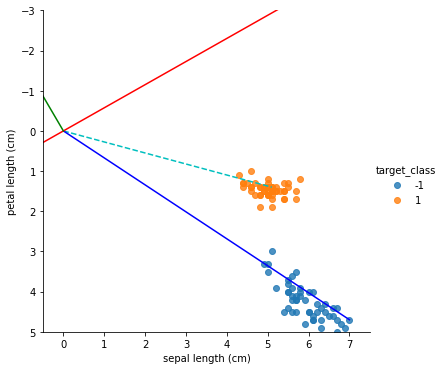

迭代次数: 2


c:\users\administrator\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


x: [1.  5.1 1.4]
w: [ 1.   3.2 -1.9]


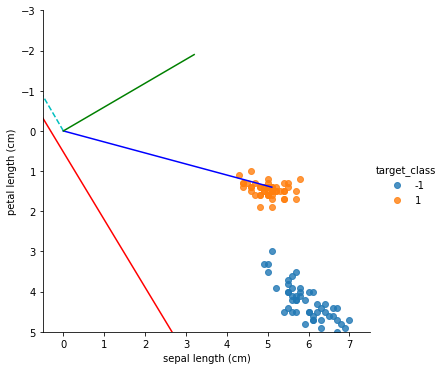

迭代次数: 3


c:\users\administrator\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


x: [1.  7.  4.7]
w: [ 0.  -3.8 -6.6]


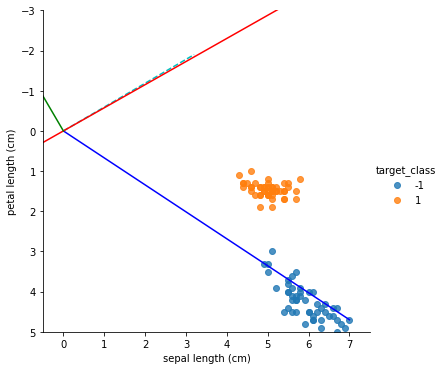

迭代次数: 4


c:\users\administrator\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


x: [1.  5.1 1.4]
w: [ 1.   1.3 -5.2]


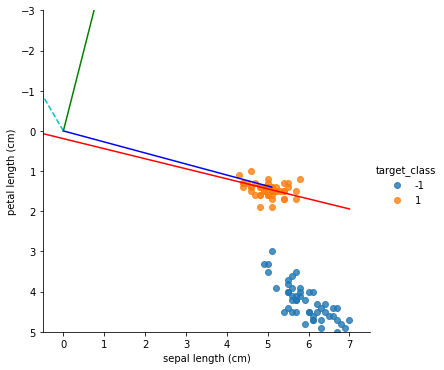

迭代次数: 5


c:\users\administrator\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


x: [1.  4.6 1.5]
w: [ 2.   5.9 -3.7]


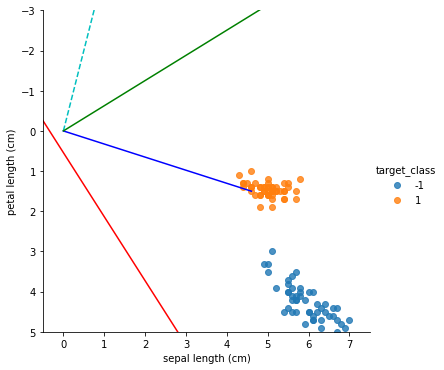

迭代次数: 6


c:\users\administrator\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


x: [1.  7.  4.7]
w: [ 1.  -1.1 -8.4]


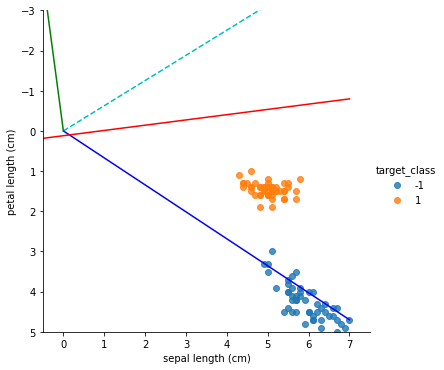

迭代次数: 7


c:\users\administrator\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


x: [1.  5.1 1.4]
w: [ 2.  4. -7.]


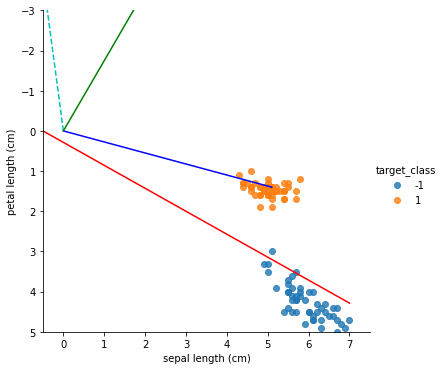

迭代次数: 8


c:\users\administrator\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


x: [1.  5.7 3.5]
w: [  1.   -1.7 -10.5]


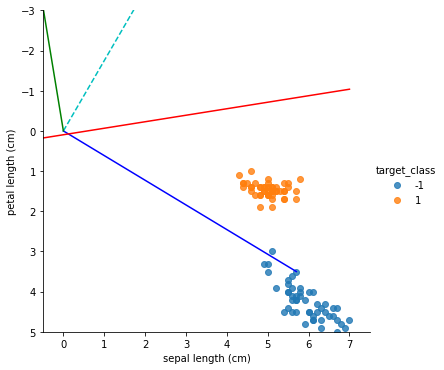

迭代次数: 9


c:\users\administrator\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


x: [1.  5.1 1.4]
w: [ 2.   3.4 -9.1]


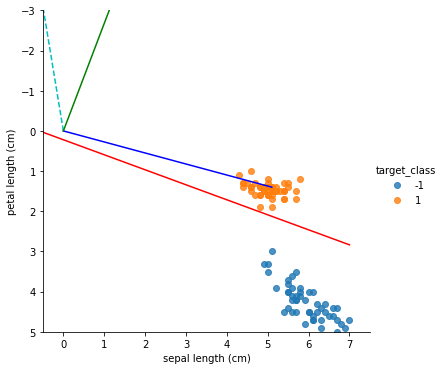

In [19]:
w = np.array([0.,0.,0.])
error = 1
iterator = 0

while error != 0:
    error = 0
    for i in range(len(iris_data)):
        x = np.concatenate((np.array([1.]), np.array(iris_data.iloc[i])[:2])) 
        y = np.array(iris_data.iloc[i])[2]
        
        if sign(np.dot(w,x)) != y:
            print("迭代次数: "+ str(iterator))
            iterator += 1
            error += 1
            sns.lmplot('sepal length (cm)','petal length (cm)',data=iris_data, fit_reg=False, hue ='target_class')
            
            # 前一个Decision boundary 的法向量， 青色虚线
            if w[1] != 0:
                x_last_decision_boundary = np.linspace(0,w[1]) #在指定的间隔内返回均匀间隔的数字
                y_last_decision_boundary = (w[2]/w[1]) * x_last_decision_boundary
                plt.plot(x_last_decision_boundary, y_last_decision_boundary,'c--')
            
            w += y*x            
            print("x: " + str(x))            
            print("w: " + str(w))
            
            
            # x向量  蓝色线表示 代表发生预测错误的点
            x_vector = np.linspace(0,x[1])
            y_vector = (x[2]/x[1]) * x_vector
            plt.plot(x_vector, y_vector,'b')
            
            # Decision boundary 的方向向量  红色线表示，用来表示分类 
            x_decision_boundary = np.linspace(-0.5,7)
            y_decision_boundary = (-w[1]/w[2]) * x_decision_boundary - (w[0]/w[2])
            plt.plot(x_decision_boundary, y_decision_boundary,'r')
            
            # Decision boundary 的法向量  绿色线表示，物理意义的w值
            x_decision_boundary_normal_vector = np.linspace(0,w[1])
            y_decision_boundary_normal_vector = (w[2]/w[1])*x_decision_boundary_normal_vector
            plt.plot(x_decision_boundary_normal_vector, y_decision_boundary_normal_vector,'g')
            
            plt.xlim(-0.5,7.5)
            plt.ylim(5,-3)
            plt.show()
